In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import linear_model
from scipy.stats import linregress


Life_exc = "resources/life_expectancy_clean.csv"
life_expectancy = pd.read_csv(Life_exc )
life_expectancy.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [2]:
count = life_expectancy["Status"].value_counts()
count

Developing    2131
Developed      438
Name: Status, dtype: int64

In [3]:
developing_countries = life_expectancy.loc[life_expectancy["Status"] == "Developing",:]
developing_countries.head()

,Country,Year,Status,Life Expectancy,Adult Mortality (%),Infant Deaths (%),Alcohol Consumpter per Capita (ltr),Percentage Expenditure,Hepatitis B Vaccines (%),Measles Cases (%),...,Polio Vaccines (%),Total Expenditure (%),Diphtheria Vaccines (%),HIV/AIDS Deaths Under 5yo (%),GDP Per Capita ($),Population,Thinness 1-19 yrs,Thinness 5-9 yrs,Income Composition of Resources,Schooling
0,Afghanistan,2015,Developing,65.0,26.3,6.2,0.01,71.28,65.0,115.4,...,6.0,8.16,65.0,0.01,584.26,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,27.1,6.4,0.01,73.52,62.0,49.2,...,58.0,8.18,62.0,0.01,612.70,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,26.8,6.6,0.01,73.22,64.0,43.0,...,62.0,8.13,64.0,0.01,631.74,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,27.2,6.9,0.01,78.18,67.0,278.7,...,67.0,8.52,67.0,0.01,669.96,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,27.5,7.1,0.01,7.10,68.0,301.3,...,68.0,7.87,68.0,0.01,63.54,2978599.0,18.2,18.2,0.454,9.5


In [4]:
infant_deaths_gdp = developing_countries.groupby(['Year'], as_index = False).agg({"GDP Per Capita ($)" : np.mean,
                                                                                                 "Infant Deaths (%)" : np.mean})                                                             

infant_deaths_gdp.head()

,Year,GDP Per Capita ($),Infant Deaths (%)
0,2000,2389.654880,4.391549
1,2001,2405.093810,4.305634
2,2002,2604.811667,4.149296
3,2003,3103.506825,4.062676
4,2004,3721.897087,3.906338


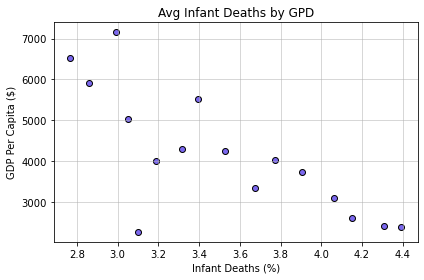

In [21]:
x_value = infant_deaths_gdp["Infant Deaths (%)"]
y_value = infant_deaths_gdp["GDP Per Capita ($)"]
plt.scatter(x_value, y_value, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Infant Deaths by GPD")
plt.xlabel("Infant Deaths (%)")
plt.ylabel("GDP Per Capita ($)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()


The r-value is 0.28658840505509325


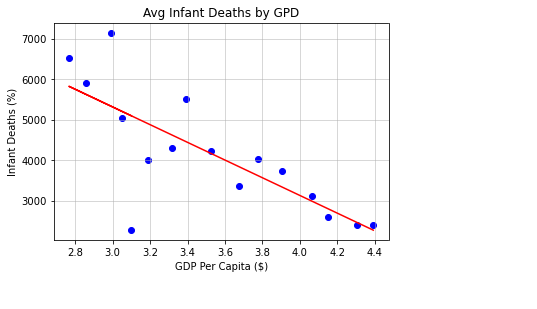

In [30]:
#USING THIS SCATTER PLOT
x_value = infant_deaths_gdp["Infant Deaths (%)"]
y_value = infant_deaths_gdp["GDP Per Capita ($)"]

(slope, intercept, rvalues, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, facecolors="blue" )

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(3.8,600),fontsize=20,color="blue")
plt.xlabel('GDP Per Capita ($)')
plt.ylabel('Infant Deaths (%)')
plt.title('Avg Infant Deaths by GPD')
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
print("The r-value is " + str(rvalue**2))


In [9]:
life_expectancy_gdp = developing_countries.groupby(['Year'], as_index = False).agg({"GDP Per Capita ($)" : np.mean,
                                                                                                 "Life Expectancy" : np.mean})                                                             

life_expectancy_gdp.head()

,Year,GDP Per Capita ($),Life Expectancy
0,2000,2389.654880,65.057746
1,2001,2405.093810,65.428873
2,2002,2604.811667,65.566197
3,2003,3103.506825,65.530986
4,2004,3721.897087,65.780986


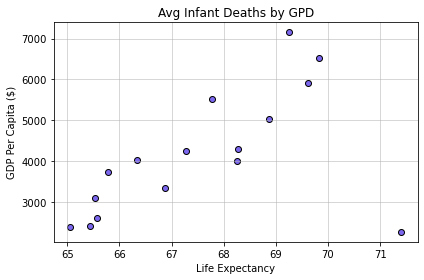

In [10]:
x_value = life_expectancy_gdp["Life Expectancy"]
y_value = life_expectancy_gdp["GDP Per Capita ($)"]
plt.scatter(x_value, y_value, facecolor = "mediumslateblue", edgecolor = "black")
plt.title("Avg Infant Deaths by GPD")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP Per Capita ($)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.tight_layout()

R squared: 0.28658840505509325


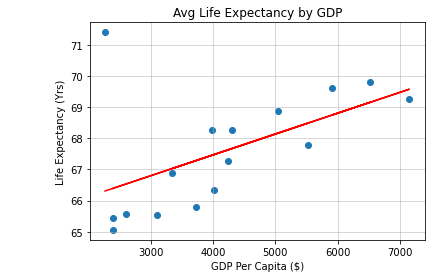

In [34]:
#USING THIS SCATTER PLOT
x_value = life_expectancy_gdp["GDP Per Capita ($)"]
y_value = life_expectancy_gdp["Life Expectancy"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_value,y_value)
plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(700,71),fontsize=20,color="blue")
plt.ylabel('Life Expectancy (Yrs)')
plt.xlabel('GDP Per Capita ($)')
plt.title('Avg Life Expectancy by GDP')
print(f"R squared: {rvalue**2}")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()

In [ ]:
developing_countries['Country'].unique()

In [ ]:
developing_countries.set_index("Country", inplace=True)
developing_countries.head()

In [ ]:
countries_life = life_expectancy.groupby(["Country"])

max_adult_mortality = countries_life["Adult Mortality (%)"].max()

highest_morality = pd.DataFrame({"Highest Adult Mortality (%)": max_adult_mortality})

highest_morality.sort_values(by='Highest Adult Mortality (%)', ascending=False).head(5)


In [ ]:
developing_countries = pd.DataFrame({
    "Country": ["Zimbabwe", "Haiti"],
    "Adult Mortality (%)": [72.3, 68.2]})
developing_countries

In [ ]:
labels = ["Zimbabwe", "Haiti"]

sizes = [72.3, 68.2]

colors = ["lightcoral", "lightskyblue"]

explode = (0.1,0)

plt.pie(sizes, 
        explode=explode,
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140)

plt.show()

In [ ]:
infant_deaths = life_expectancy.groupby(["Country"])

max_infant_deaths = infant_deaths["Infant Deaths (%)"].max()

highest_deaths = pd.DataFrame({"Highest Infant Deaths (%)": max_infant_deaths})

highest_deaths.sort_values(by='Highest Infant Deaths (%)', ascending=False).head()

In [ ]:
developing_countries = pd.DataFrame({
    "Country": ["India", "Nigeria"],
    "Infant Deaths (%)": [180.0, 57.6]})
developing_countries

In [ ]:
labels = ["India", "Nigeria"]

sizes = [180.0, 57.6]

colors = ["lightcoral", "lightskyblue"]

explode = (0, 0.1)

plt.pie(sizes, 
        explode=explode,
        labels=labels, 
        colors=colors,
        autopct="%1.1f%%", 
        shadow=True, 
        startangle=140)

plt.show()